In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # special pipeline that supports resampling


In [2]:

# 1. Load cleaned data
df = pd.read_csv("data/EDA_cleaned_telecom_churn_data.csv")

# Drop customerID
df.drop("customerID", axis=1, inplace=True)

# Encode target
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Train/test split
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Churn"])

X_train = train.drop("Churn", axis=1)
y_train = train["Churn"]
X_test = test.drop("Churn", axis=1)
y_test = test["Churn"]

# Separate numeric and categorical columns
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_features = [col for col in X_train.columns if col not in numeric_features]



In [3]:

# Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [4]:

# Define model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)


In [5]:

# Build pipeline with SMOTE + preprocessing + model
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(sampling_strategy="minority", random_state=42)),
    ("classifier", rf_model)
])


In [6]:

# Train pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        random_state=42))])

In [7]:

# Save model
import joblib
joblib.dump(pipeline, "model/churn_model.pkl")

['model/churn_model.pkl']

In [17]:
rf_model

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [18]:
type(rf_model)

sklearn.ensemble._forest.RandomForestClassifier

In [20]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        random_state=42))])

In [21]:
type(pipeline)

imblearn.pipeline.Pipeline

In [22]:
# Access the classifier
rf_model_trained = pipeline.named_steps["classifier"]

In [23]:
# Get numeric and categorical feature names
numeric_features = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_features = [col for col in X_train.columns if col not in numeric_features]


In [24]:
# Get the encoder from the pipeline
encoder = pipeline.named_steps["preprocessor"].named_transformers_["cat"]
encoded_cat_features = encoder.get_feature_names_out(categorical_features)


In [27]:
# Combine numeric and encoded categorical feature names
all_features = np.concatenate([numeric_features, encoded_cat_features])


In [28]:
# Get feature importances
importances = rf_model_trained.feature_importances_


In [29]:
# Create DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


In [30]:
feature_importance_df

,Feature,Importance
0,tenure,0.145636
25,Contract_Two year,0.110026
2,TotalCharges,0.091463
28,PaymentMethod_Electronic check,0.075542
1,MonthlyCharges,0.069408
10,InternetService_Fiber optic,0.063783
13,OnlineSecurity_Yes,0.061446
24,Contract_One year,0.052597
26,PaperlessBilling_Yes,0.042676
19,TechSupport_Yes,0.036097


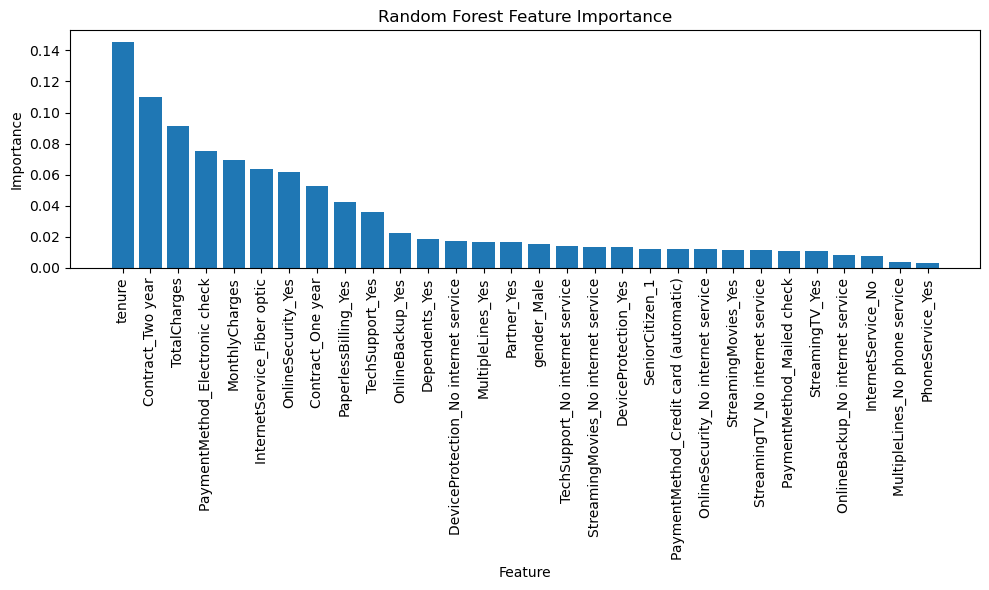

In [33]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


In [34]:
# Save the feature importance dataframe
feature_importance_df.to_csv("data/feature_importances.csv", index=False)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions on train and test
y_train_pred = pipeline.predict(X_train)
y_train_prob = pipeline.predict_proba(X_train)[:, 1]

y_test_pred = pipeline.predict(X_test)
y_test_prob = pipeline.predict_proba(X_test)[:, 1]

# Function to compute metrics
def evaluate_model(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

# Train metrics
train_metrics = evaluate_model(y_train, y_train_pred, y_train_prob)
print("Train Metrics:", train_metrics)

# Test metrics
test_metrics = evaluate_model(y_test, y_test_pred, y_test_prob)
print("Test Metrics:", test_metrics)


Train Metrics: {'Accuracy': 0.8439829605963791, 'Precision': 0.6610878661087866, 'Recall': 0.8454849498327759, 'F1 Score': 0.7420017610801292, 'ROC-AUC': np.float64(0.9251606991493752)}
Test Metrics: {'Accuracy': 0.7650816181689141, 'Precision': 0.5434343434343434, 'Recall': 0.7192513368983957, 'F1 Score': 0.619102416570771, 'ROC-AUC': np.float64(0.8420922782815367)}


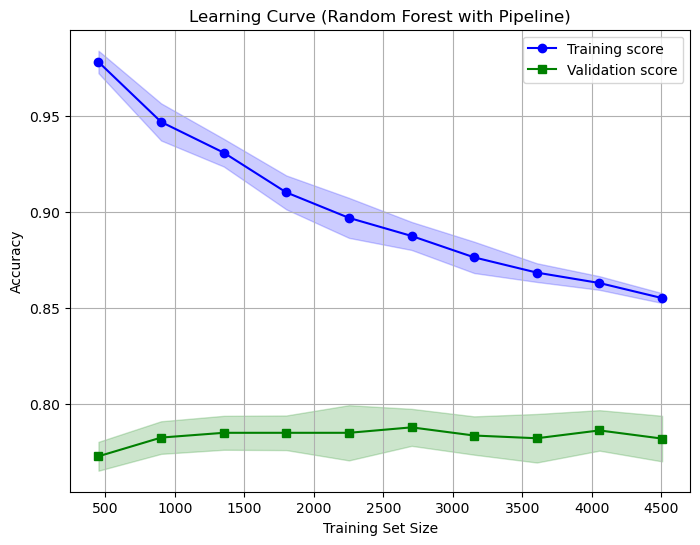

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    pipeline,
    X_train,
    y_train,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, test_mean, label="Validation score", color="green", marker="s")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.title("Learning Curve (Random Forest with Pipeline)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


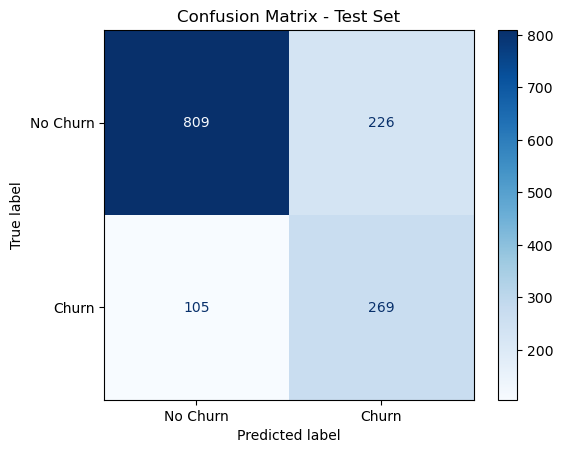

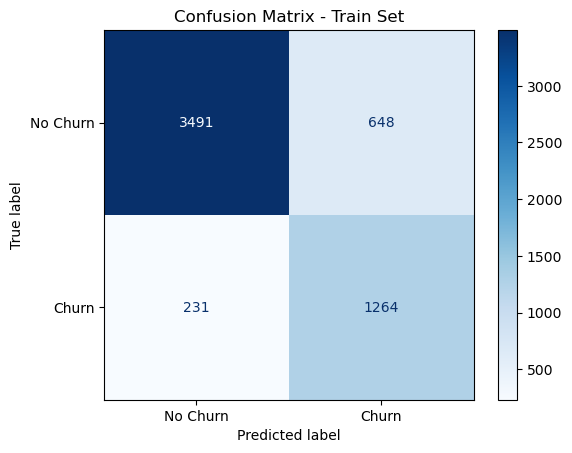

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions on train and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for test set
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Test Set")
plt.show()

# (Optional) for train set
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["No Churn", "Churn"])
disp_train.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Train Set")
plt.show()
